In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = 'bitcoin_2021_2024.csv'

df = pd.read_csv(file_path, low_memory=False)

In [3]:
# prepare data (time)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

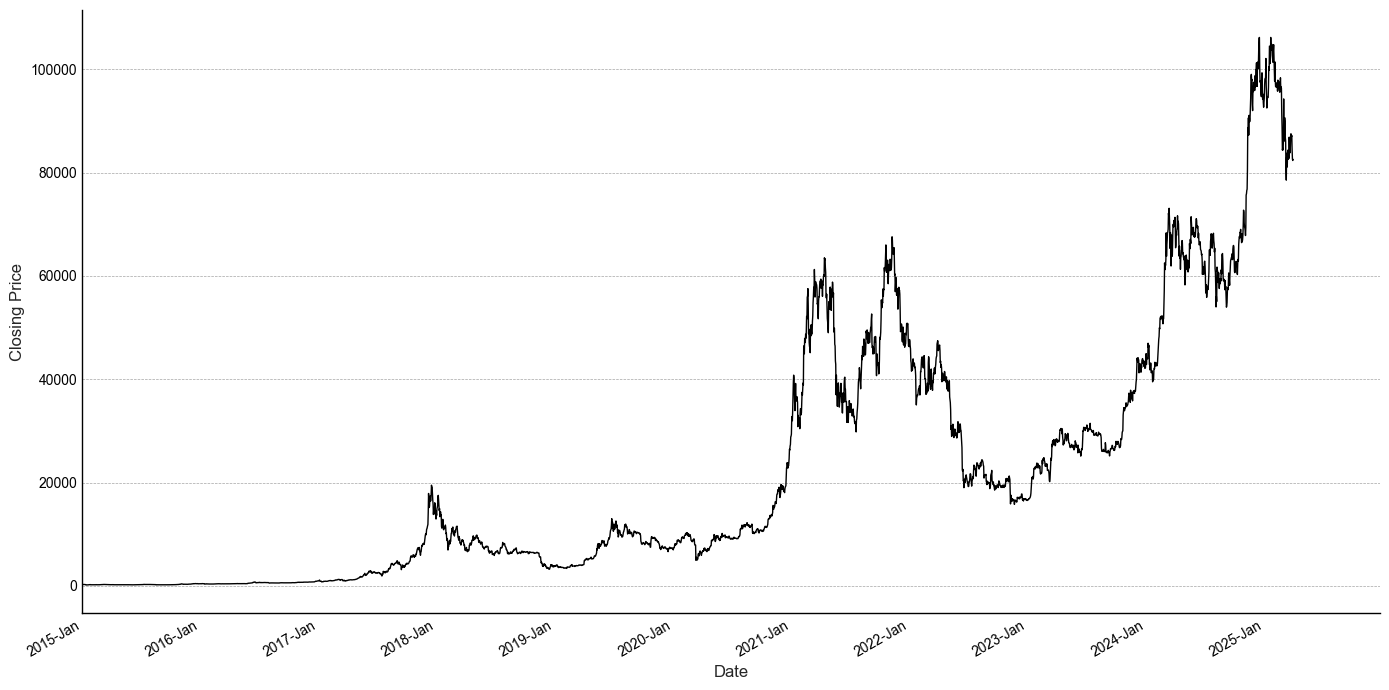

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df.index, df['close'], color='black', linewidth=1.0, label='Daily Closing Price')

ax.set_xlim(left=pd.to_datetime('2015-01-01'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing Price', fontsize=12)
# ax.set_title('Bitcoin Daily Closing Prices (until March 2025)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=8, maxticks=15))

plt.xticks(rotation=30, ha='right')

ax.grid(True, which='major', axis='y', linestyle='--', linewidth='0.5', color='grey', alpha=0.7)
ax.grid(False, which='major', axis='x')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.tight_layout()

plt.show()

In [8]:
df = pd.read_csv("bitcoin-google-trends(1).csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
# Avoid log(0) error
df['Google Trends'] = df['Google Trends'].replace(0, 1)

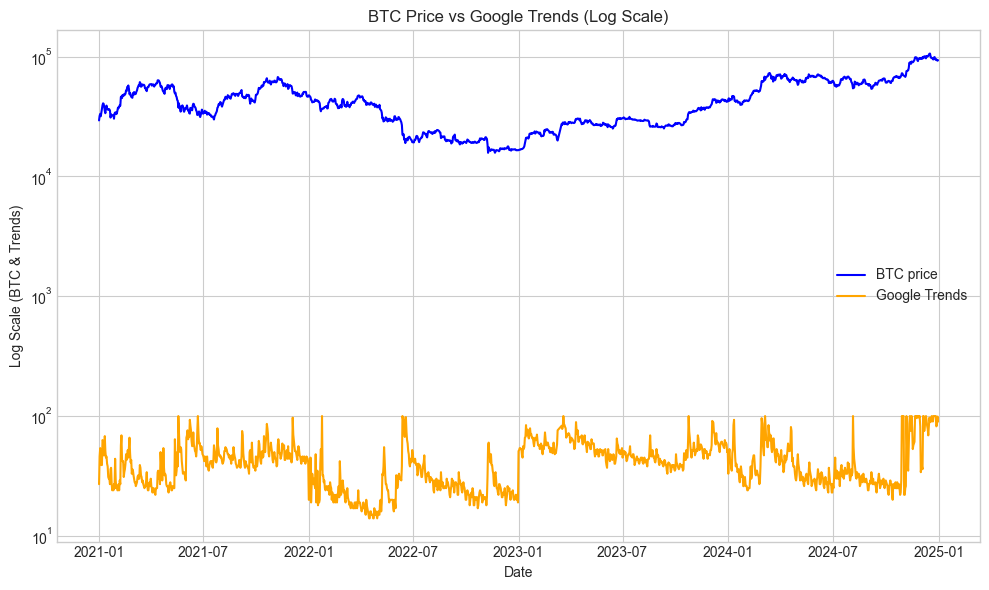

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['BTC price'], label='BTC price', color='blue')
plt.plot(df['DateTime'], df['Google Trends'], label='Google Trends', color='orange')

plt.yscale('log')  # Logarithmic y-axis
plt.ylabel('Log Scale (BTC & Trends)')
plt.xlabel('Date')
plt.title('BTC Price vs Google Trends (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()

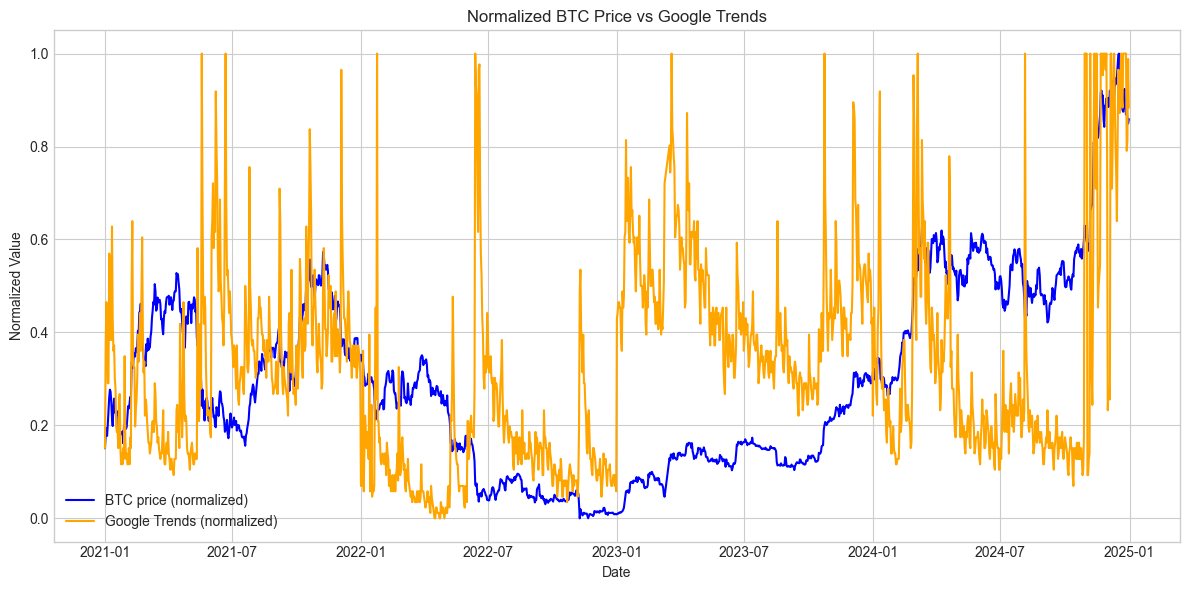

Correlation coefficient: 0.1992


In [16]:
scaler = MinMaxScaler()
df[['BTC_norm', 'Trends_norm']] = scaler.fit_transform(df[['BTC price', 'Google Trends']])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['BTC_norm'], label='BTC price (normalized)', color='blue')
plt.plot(df['DateTime'], df['Trends_norm'], label='Google Trends (normalized)', color='orange')
plt.title("Normalized BTC Price vs Google Trends")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
corr = df['BTC price'].corr(df['Google Trends'])
print(f"Correlation coefficient: {corr:.4f}")